In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
train_normal_cases = '/content/drive/MyDrive/Xray/train/NORMAL'
train_pneu_cases = '/content/drive/MyDrive/Xray/test/PNEUMONIA'

test_normal_cases = '/content/drive/MyDrive/Xray/test/NORMAL'
test_pneu_cases = '/content/drive/MyDrive/Xray/test/PNEUMONIA'

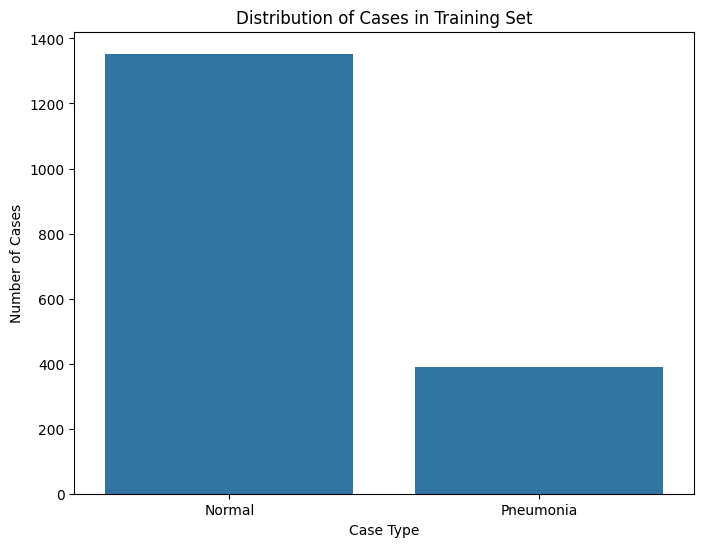

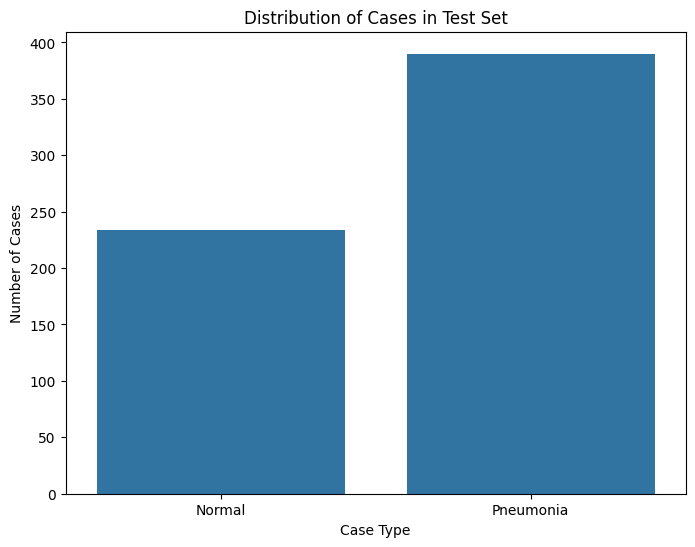

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Count the number of normal and pneumonia cases in the training set
train_normal_count = len(os.listdir(train_normal_cases))
train_pneumonia_count = len(os.listdir(train_pneu_cases))

# Create a bar plot
labels = ['Normal', 'Pneumonia']
counts = [train_normal_count, train_pneumonia_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=counts)
plt.title('Distribution of Cases in Training Set')
plt.xlabel('Case Type')
plt.ylabel('Number of Cases')
plt.show()


# Count the number of normal and pneumonia cases in the test set
test_normal_count = len(os.listdir(test_normal_cases))
test_pneumonia_count = len(os.listdir(test_pneu_cases))

# Create a bar plot for the test set
labels = ['Normal', 'Pneumonia']
counts = [test_normal_count, test_pneumonia_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=counts)
plt.title('Distribution of Cases in Test Set')
plt.xlabel('Case Type')
plt.ylabel('Number of Cases')
plt.show()

Normal Cases in Training Set:


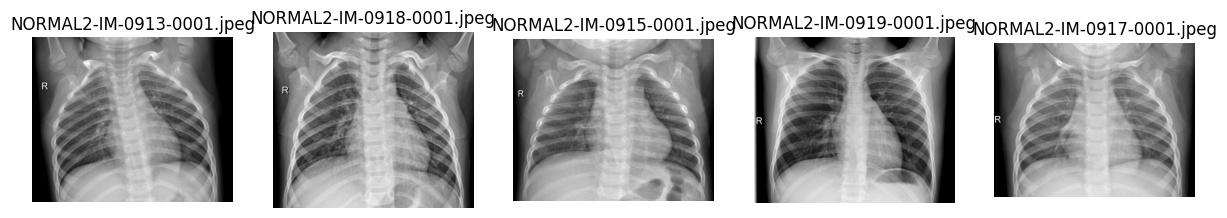


Pneumonia Cases in Training Set:


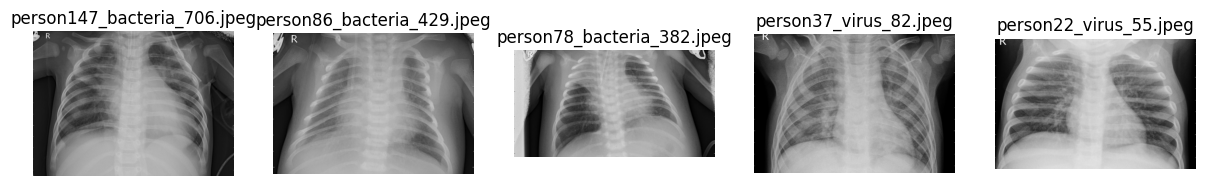

In [ ]:
import os
import matplotlib.image as mpimg

# Function to display images from a directory
def display_images_from_directory(directory, num_images=5):
    image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    num_images = min(num_images, len(image_files))

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        image_path = os.path.join(directory, image_files[i])
        img = mpimg.imread(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(image_files[i])
        plt.axis('off')
    plt.show()

# Preview images from the normal cases in the training set
print("Normal Cases in Training Set:")
display_images_from_directory(train_normal_cases)

# Preview images from the pneumonia cases in the training set
print("\nPneumonia Cases in Training Set:")
display_images_from_directory(train_pneu_cases)


In [ ]:
import random as rn
train_list = []
test_list = []

for x in os.listdir(train_normal_cases):
    train_list.append([os.path.join(train_normal_cases, x), 0])

for x in os.listdir(train_pneu_cases):
    train_list.append([os.path.join(train_pneu_cases, x), 1])

for x in os.listdir(test_normal_cases):
    test_list.append([os.path.join(test_normal_cases, x), 0])

for x in os.listdir(test_pneu_cases):
    test_list.append([os.path.join(test_pneu_cases, x), 1])


rn.shuffle(train_list)
rn.shuffle(test_list)

#DataFrames
train_df = pd.DataFrame(train_list, columns=['image', 'label'])
test_df = pd.DataFrame(test_list, columns=['image', 'label'])

In [ ]:
import os
import cv2
import numpy as np

def process_data(img_path):
    img = cv2.imread(img_path)  # قراءة الصورة
    if img is None:  # التحقق من أن الصورة تم تحميلها بنجاح
        print(f"Error loading image: {img_path}")
        return None

    img = cv2.resize(img, (196, 196))  # تغيير الحجم إلى 196x196
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # تحويل إلى الرمادي
    img = img / 255.0  # تطبيع القيم بين 0 و 1
    img = np.reshape(img, (196, 196, 1))  # إعادة تشكيل الصورة
    return img

def compose_dataset(df):
    data = []
    labels = []

    for img_path, label in df.values:
        processed_img = process_data(img_path)
        if processed_img is not None:  # أضف فقط الصور الصحيحة
            data.append(processed_img)
            labels.append(label)

    return np.array(data), np.array(labels)

# إنشاء بيانات التدريب والاختبار
X_train, y_train = compose_dataset(train_df)
X_test, y_test = compose_dataset(test_df)

# طباعة أبعاد البيانات
print('Train data shape: {}, Labels shape: {}'.format(X_train.shape, y_train.shape))
print('Test data shape: {}, Labels shape: {}'.format(X_test.shape, y_test.shape))

Train data shape: (1743, 196, 196, 1), Labels shape: (1743,)
Test data shape: (624, 196, 196, 1), Labels shape: (624,)


In [ ]:
# define generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

# fit generator on our train features
datagen.fit(X_train)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 196, 196, 8)         │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 196, 196, 8)         │           3,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 65, 65, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 65, 65, 16)          │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 65, 65, 16)          │           6,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 21, 21, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 21, 21, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 21, 21, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 5, 5, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 369,850 (1.41 MB)

 Trainable params: 369,850 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1308/1308 ━━━━━━━━━━━━━━━━━━━━ 889s 677ms/step - accuracy: 0.3255 - loss: 0.8736 - val_accuracy: 0.8317 - val_loss: 0.4097
Epoch 2/15
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 874s 668ms/step - accuracy: 0.7923 - loss: 0.4074 - val_accuracy: 0.8558 - val_loss: 0.3612
Epoch 3/15
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 878s 671ms/step - accuracy: 0.8344 - loss: 0.3366 - val_accuracy: 0.8830 - val_loss: 0.3265
Epoch 4/15
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 880s 672ms/step - accuracy: 0.8746 - loss: 0.2759 - val_accuracy: 0.8846 - val_loss: 0.3392
Epoch 5/15
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 909s 662ms/step - accuracy: 0.8509 - loss: 0.3127 - val_accuracy: 0.8654 - val_loss: 0.3635
Epoch 6/15
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 868s 663ms/step - accuracy: 0.9104 - loss: 0.1894 - val_accuracy: 0.8846 - val_loss: 0.3324
Epoch 7/15
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 915s 658ms/step - accuracy: 0.8964 - loss: 0.2031 - val_accuracy: 0.8926 - val_loss: 0.2871
Epoch 8/15
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 865s 661ms/step - accuracy: 0.9

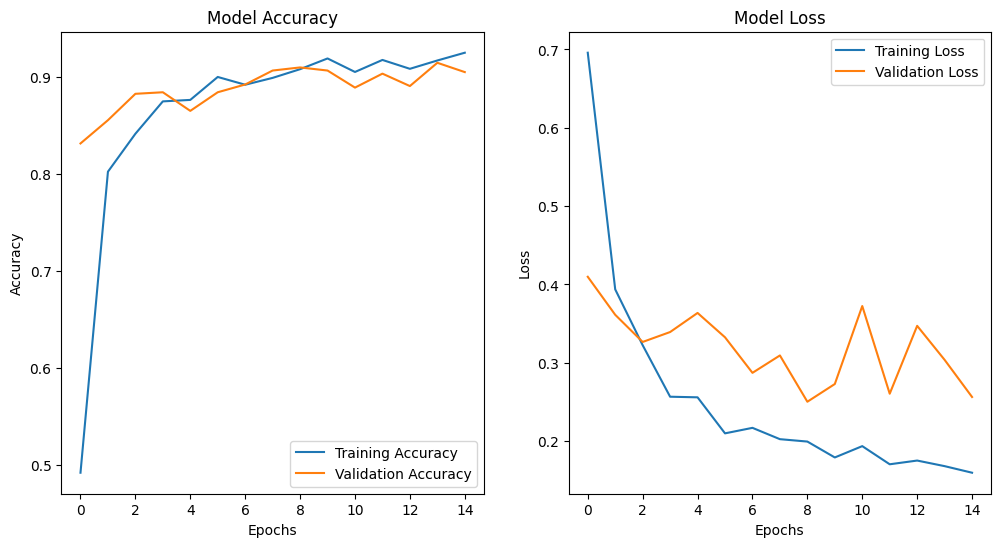

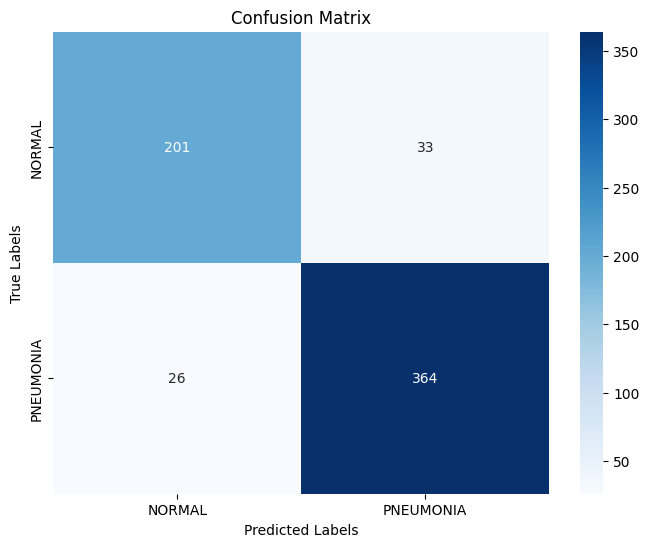

In [ ]:
# استيراد المكتبات المطلوبة
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. إنشاء نموذج الشبكة العصبية
model = Sequential()

# إضافة طبقة الإدخال
model.add(Input(shape=(196, 196, 1)))

# الطبقة الأولى: مجموعة من الطبقات التلافيفية والتجميعية
model.add(Conv2D(filters=8, kernel_size=(7, 7), padding='same', activation='relu'))
model.add(Conv2D(filters=8, kernel_size=(7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# الطبقة الثانية: مجموعة جديدة من الطبقات التلافيفية والتجميعية
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# الطبقة الثالثة: تكثيف عدد الفلاتر مع تقليل حجم البيانات
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# الطبقة الرابعة: إضافة المزيد من الفلاتر لتحسين التمييز
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# الطبقة الخامسة: زيادة عمق الشبكة باستخدام 128 فلترًا
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2. تحويل البيانات المسطحة وإضافة طبقات كثيفة
model.add(Flatten())
model.add(Dense(128, activation='relu'))  # طبقة كثيفة
model.add(Dropout(0.2))  # تقليل الإفراط في التكيف
model.add(Dense(2, activation='softmax'))  # طبقة الإخراج

# 3. إعداد عملية التدريب
# تعديل Adam ليستخدم `learning_rate` بدلاً من `lr`
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# عرض هيكل النموذج
model.summary()
# 4. إضافة التوقف المبكر للتقليل من التدريب الزائد
callback = EarlyStopping(monitor='loss', patience=6)

# 5. تدريب النموذج
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=4),
    validation_data=(X_test, y_test),
    epochs=15,
    verbose=1,
    callbacks=[callback],
    class_weight={0: 6.0, 1: 0.5}
)

# 6. تقييم النموذج وطباعة مصفوفة الالتباس
# توقع القيم للبيانات الاختبارية
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # تحويل التوقعات إلى الفئات
y_true = np.argmax(y_test, axis=1)  # القيم الحقيقية

# حساب مصفوفة الالتباس
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# طباعة تقرير التصنيف
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

# رسم الدقة والخسارة أثناء التدريب
def plot_training_history(history):
    # الرسم البياني للدقة
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # الرسم البياني للخسارة
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# استدعاء دالة الرسم
plot_training_history(history)

# رسم مصفوفة الالتباس
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# استدعاء دالة رسم مصفوفة الالتباس
class_names = ['NORMAL', 'PNEUMONIA']  # يمكنك تعديل أسماء الفئات حسب بياناتك
plot_confusion_matrix(conf_matrix, class_names)

In [ ]:
import os
import pandas as pd

# تعريف مسارات البيانات
train_normal_cases = '/content/drive/MyDrive/Pneumonia/train/NORMAL'
train_pneu_cases = '/content/drive/MyDrive/Pneumonia/train/PNEUMONIA'

test_normal_cases = '/content/drive/MyDrive/Pneumonia/test/NORMAL'
test_pneu_cases = '/content/drive/MyDrive/Pneumonia/test/PNEUMONIA'

# توليد مسارات البيانات مع التصنيفات
filepaths = []
labels = []

# قراءة بيانات التدريب (train)
for filename in os.listdir(train_normal_cases):
    filepaths.append(os.path.join(train_normal_cases, filename))
    labels.append('NORMAL')

for filename in os.listdir(train_pneu_cases):
    filepaths.append(os.path.join(train_pneu_cases, filename))
    labels.append('PNEUMONIA')

# قراءة بيانات الاختبار (test)
for filename in os.listdir(test_normal_cases):
    filepaths.append(os.path.join(test_normal_cases, filename))
    labels.append('NORMAL')

for filename in os.listdir(test_pneu_cases):
    filepaths.append(os.path.join(test_pneu_cases, filename))
    labels.append('PNEUMONIA')

# تحويل المسارات والتصنيفات إلى DataFrame
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis=1)

# طباعة عينة من البيانات للتأكد
print(df.head())

# حفظ DataFrame إلى ملف CSV إذا كنت بحاجة إلى ذلك
# df.to_csv('pneumonia_dataset.csv', index=False)


                                           filepaths  labels
0  /content/drive/MyDrive/Pneumonia/train/NORMAL/...  NORMAL
1  /content/drive/MyDrive/Pneumonia/train/NORMAL/...  NORMAL
2  /content/drive/MyDrive/Pneumonia/train/NORMAL/...  NORMAL
3  /content/drive/MyDrive/Pneumonia/train/NORMAL/...  NORMAL
4  /content/drive/MyDrive/Pneumonia/train/NORMAL/...  NORMAL


In [ ]:
from sklearn.model_selection import train_test_split

# تقسيم البيانات إلى مجموعة تدريب ومجموعة مؤقتة (dummy_df)
train_df, dummy_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=123)

# تقسيم المجموعة المؤقتة (dummy_df) إلى مجموعة تحقق (valid_df) واختبار (test_df)
valid_df, test_df = train_test_split(dummy_df, train_size=0.6, shuffle=True, random_state=123)

# طباعة أحجام البيانات للتأكد من تقسيمها بشكل صحيح
print(f"Train data size: {len(train_df)}")
print(f"Validation data size: {len(valid_df)}")
print(f"Test data size: {len(test_df)}")


Train data size: 4685
Validation data size: 703
Test data size: 469


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# تحديد حجم الصورة وعدد القنوات
batch_size = 16
img_size = (224, 224)  # الحجم الجديد للصور
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# حساب حجم الدفعة للاختبار باستخدام حجم البيانات
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length % n == 0 and ts_length / n <= 80]))
test_steps = ts_length // test_batch_size

# دالة مخصصة لمعالجة الصور قبل إرسالها للموديل (هنا نستخدمها بدون أي معالجة إضافية)
def scalar(img):
    return img

# توليد بيانات التدريب مع التوليد المسبق
tr_gen = ImageDataGenerator(preprocessing_function=scalar)
ts_gen = ImageDataGenerator(preprocessing_function=scalar)

# إعداد مولد بيانات التدريب
train_gen = tr_gen.flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

# إعداد مولد بيانات التحقق (validation)
valid_gen = ts_gen.flow_from_dataframe(
    valid_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

# إعداد مولد بيانات الاختبار مع استخدام حجم الدفعة المخصص وعدم الخلط بين البيانات
test_gen = ts_gen.flow_from_dataframe(
    test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=test_batch_size
)


Found 4685 validated image filenames belonging to 2 classes.
Found 703 validated image filenames belonging to 2 classes.
Found 468 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adamax
import tensorflow as tf

# إعدادات الصورة وعدد القنوات
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# حساب عدد الفئات
class_count = len(list(train_gen.class_indices.keys()))  # عدد الفئات في الطبقة الأخيرة

# تحميل نموذج EfficientNetB0 المسبق التدريب
base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

# إنشاء النموذج
model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(256, kernel_regularizer=regularizers.l2(0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.45, seed=123),
    Dense(class_count, activation='softmax')  # طبقة الخرج بعدد الفئات
])

# تجميع النموذج
model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# طباعة ملخص النموذج
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 1280)                │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,383,141 (16.72 MB)

 Trainable params: 4,338,558 (16.55 MB)

 Non-trainable params: 44,583 (174.16 KB)

In [ ]:
batch_size = 32  # تعيين حجم الدفعة للتدريب
epochs = 5  # عدد العصور في التدريب

# تدريب النموذج باستخدام بيانات التدريب والتحقق
history = model.fit(
    x=train_gen,  # بيانات التدريب
    epochs=epochs,  # عدد العصور
    verbose=1,  # إظهار المعلومات أثناء التدريب
    validation_data=valid_gen,  # بيانات التحقق
    validation_steps=None,  # تحديد عدد الخطوات للتحقق (اختياري)
    shuffle=True  # مزامنة البيانات أثناء التدريب لتوزيع العينات بشكل عشوائي
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


293/293 ━━━━━━━━━━━━━━━━━━━━ 1431s 5s/step - accuracy: 0.8117 - loss: 10.2201 - val_accuracy: 0.7169 - val_loss: 4.7852
Epoch 2/5
293/293 ━━━━━━━━━━━━━━━━━━━━ 1408s 5s/step - accuracy: 0.7229 - loss: 4.3206 - val_accuracy: 0.7198 - val_loss: 3.1067
Epoch 3/5
293/293 ━━━━━━━━━━━━━━━━━━━━ 1388s 5s/step - accuracy: 0.7626 - loss: 2.8030 - val_accuracy: 0.7511 - val_loss: 2.0157
Epoch 4/5
293/293 ━━━━━━━━━━━━━━━━━━━━ 1404s 5s/step - accuracy: 0.8461 - loss: 1.8464 - val_accuracy: 0.9474 - val_loss: 1.3274
Epoch 5/5
293/293 ━━━━━━━━━━━━━━━━━━━━ 1378s 5s/step - accuracy: 0.8670 - loss: 1.2641 - val_accuracy: 0.9317 - val_loss: 0.9074


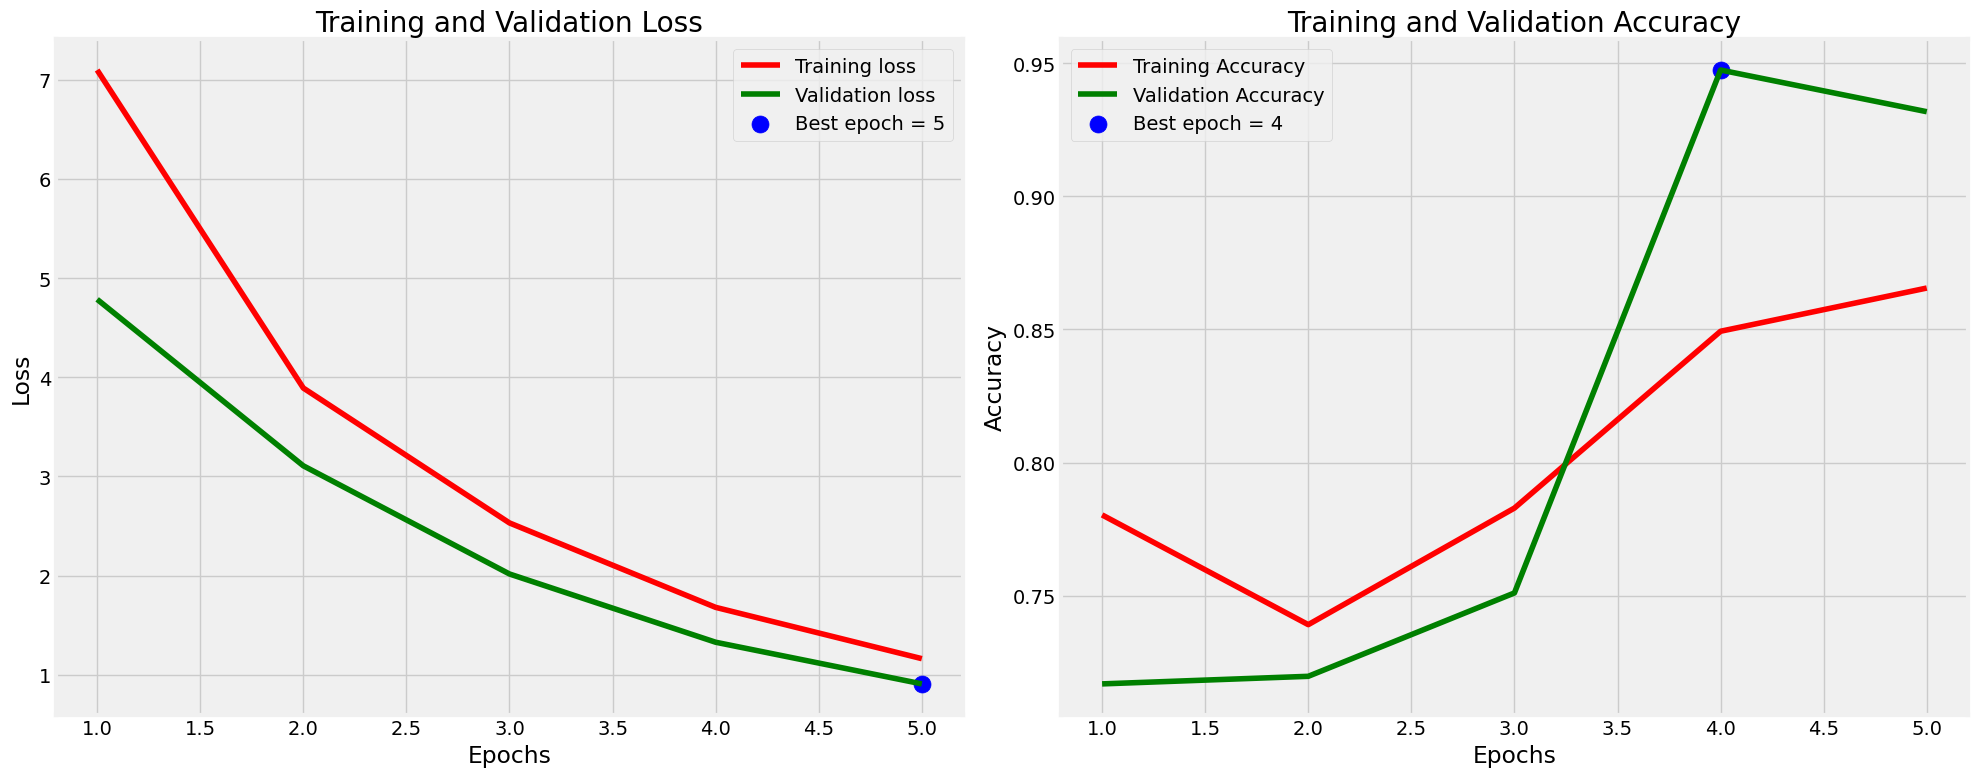

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)  # Indices of lowest validation loss
val_lowest = val_loss[index_loss]  # The lowest validation loss value
index_acc = np.argmax(val_acc)  # Indices of highest validation accuracy
acc_highest = val_acc[index_acc]  # The highest validation accuracy value
Epochs = [i + 1 for i in range(len(tr_acc))]  # List of epochs for plotting

loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

# Plot loss values (Training and Validation)
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy values (Training and Validation)
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
# Get length of test data
ts_length = len(test_df)

# Calculate test batch size, ensuring it does not exceed 80 batches
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length % n == 0 and ts_length // n <= 80]))

# Calculate the number of steps for test data based on batch size
test_steps = ts_length // test_batch_size

# Evaluate the model on train, valid, and test data
train_score = model.evaluate(train_gen, steps=test_steps, verbose=1)
valid_score = model.evaluate(valid_gen, steps=test_steps, verbose=1)
test_score = model.evaluate(test_gen, steps=test_steps, verbose=1)

# Print results for train, validation, and test datasets
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])


7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9300 - loss: 0.8990
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9798 - loss: 0.8815


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step - accuracy: 0.9663 - loss: 1.3312
Train Loss:  0.8873990774154663
Train Accuracy:  0.9464285969734192
--------------------
Validation Loss:  0.9069732427597046
Validation Accuracy:  0.9464285969734192
--------------------
Test Loss:  1.3219197988510132
Test Accuracy:  0.9594017267227173


In [ ]:
# Make predictions using the test generator
preds = model.predict(test_gen)

# Get the predicted class indices by taking the argmax across the class dimension
y_pred = np.argmax(preds, axis=1)


7/7 ━━━━━━━━━━━━━━━━━━━━ 56s 8s/step


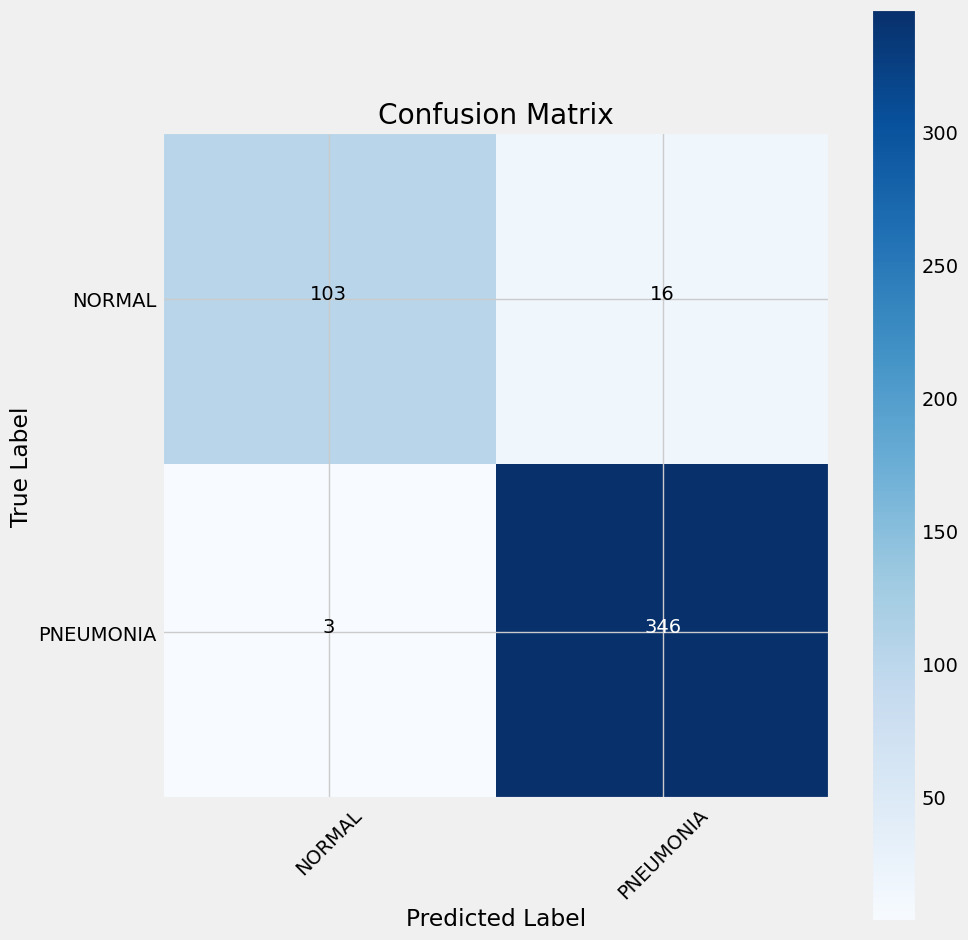

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Get class indices and class labels
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations on the confusion matrix
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names=classes))

              precision    recall  f1-score   support

      NORMAL       0.97      0.87      0.92       119
   PNEUMONIA       0.96      0.99      0.97       349

    accuracy                           0.96       468
   macro avg       0.96      0.93      0.94       468
weighted avg       0.96      0.96      0.96       468



# **رهام**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 653ms/step - accuracy: 0.5012 - loss: 18.7011 - val_accuracy: 0.2000 - val_loss: 82.4408
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 825ms/step - accuracy: 0.6119 - loss: 7.1142 - val_accuracy: 0.2000 - val_loss: 13.2964
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 625ms/step - accuracy: 0.4421 - loss: 1.9722 - val_accuracy: 0.2000 - val_loss: 10.2501
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 528ms/step - accuracy: 0.4152 - loss: 1.5506 - val_accuracy: 0.2000 - val_loss: 12.4734
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 642ms/step - accuracy: 0.5549 - loss: 0.9485 - val_accuracy: 0.2000 - val_loss: 15.1826
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 646ms/step - accuracy: 0.4691 - loss: 1.0156 - val_accuracy: 0.2000 - val_loss: 14.5941
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 671ms/step - accuracy: 0.4490 - loss: 1.1708 - val_accuracy: 0.2000 - val_loss: 13.5965
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 675ms/step - accuracy: 0.4925 - loss: 0.9051 - val_accurac

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


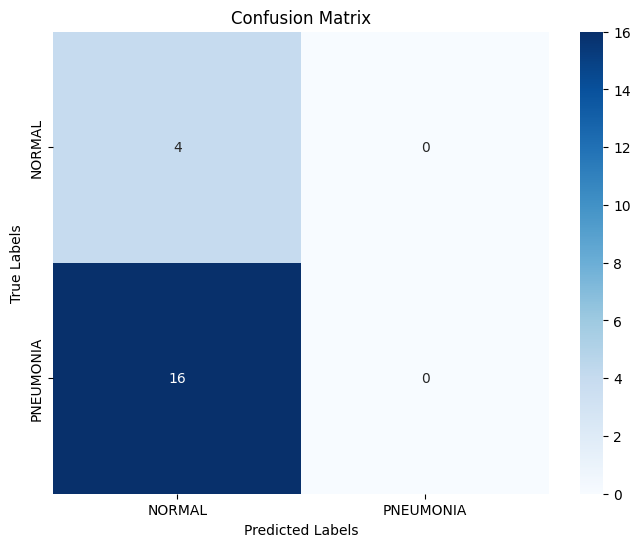

In [ ]:
# تأكد من أنك قمت بتجهيز البيانات كما هو مطلوب قبل استخدام Data Augmentation

import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. افترض أن لديك صور بياناتك في متغير `images` وملصقاتها في متغير `labels`
# استبدل هذا بالبيانات الفعلية الخاصة بك
images = np.random.rand(100, 196, 196, 1)  # بيانات صور عشوائية (استبدلها ببياناتك الحقيقية)
labels = np.random.randint(0, 2, size=(100,))  # ملصقات عشوائية (0 أو 1)

# 2. تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# 3. تحويل الملصقات إلى تمثيل One-Hot
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# 4. تحسين الـ Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# ملائمة بيانات التدريب إلى معزز البيانات
datagen.fit(X_train)

# 5. بناء النموذج
def build_model(input_shape=(196, 196, 1), num_classes=2):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# بناء النموذج
model = build_model(input_shape=(196, 196, 1), num_classes=2)

# 6. استخدام EarlyStopping مع patience أكبر
callback = EarlyStopping(monitor='val_loss', patience=10)

# 7. تحسين learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 8. تدريب النموذج
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=4),
    validation_data=(X_test, y_test),
    epochs=10,
    verbose=1,
    callbacks=[callback],
    class_weight={0: 6.0, 1: 0.5}
)

# 9. التقييم
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# حساب مصفوفة الالتباس
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

# رسم مصفوفة الالتباس
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix(conf_matrix)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.5517 - loss: 1.5961 - val_accuracy: 0.5000 - val_loss: 1.4495
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.5022 - loss: 0.9703 - val_accuracy: 0.5000 - val_loss: 1.2051
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.4726 - loss: 0.9624 - val_accuracy: 0.5000 - val_loss: 2.1483
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.5615 - loss: 0.9279 - val_accuracy: 0.5000 - val_loss: 1.0368
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.5279 - loss: 1.0075 - val_accuracy: 0.5000 - val_loss: 0.9777
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.5416 - loss: 0.9249 - val_accuracy: 0.5000 - val_loss: 1.2285
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.5235 - loss: 0.8947 - val_accuracy: 0.5000 - val_loss: 1.4595
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.4985 - loss: 0.9000 - val_accuracy: 0.5000 - val_loss: 1.6728
Epo

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


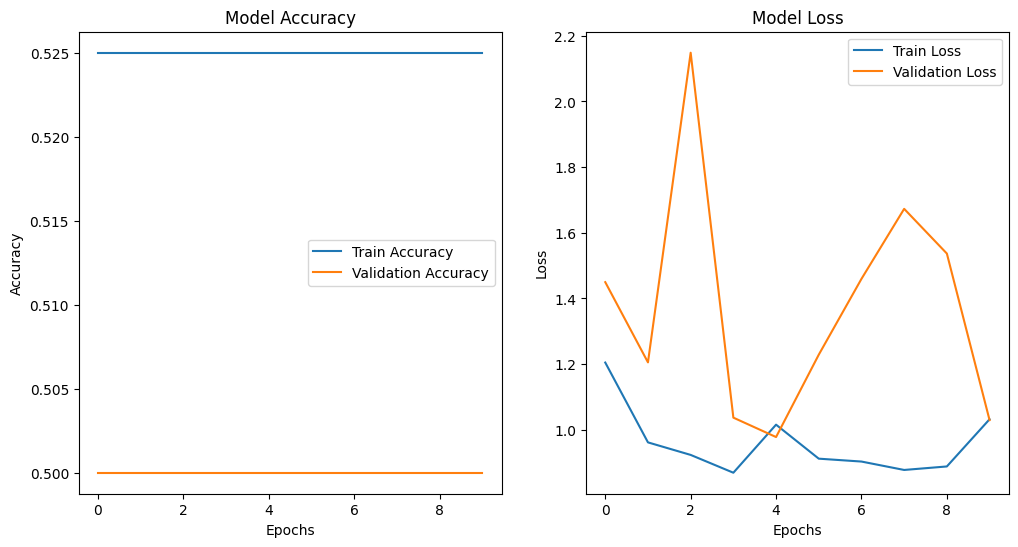

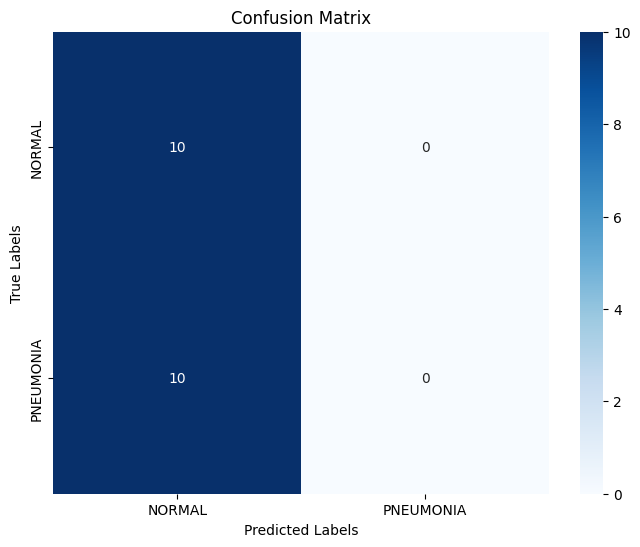

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# 1. إنشاء وحدة ResNet الأساسية
def resnet_block(x, filters, kernel_size=(3, 3), stride=1):
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=stride, padding='same', activation='relu')(x)
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=stride, padding='same', activation='relu')(x)
    return x

# 2. بناء النموذج ResNet-18
def build_resnet18(input_shape=(196, 196, 1)):
    input_layer = Input(shape=input_shape)

    x = Conv2D(filters=8, kernel_size=(7, 7), padding='same', activation='relu')(input_layer)
    x = MaxPooling2D(pool_size=(3, 3))(x)

    x = resnet_block(x, filters=16)
    x = resnet_block(x, filters=32)
    x = resnet_block(x, filters=64)
    x = resnet_block(x, filters=128)

    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    output_layer = Dense(2, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# 3. تدريب النموذج
def train_model(X_train, y_train, X_test, y_test):
    model = build_resnet18(input_shape=(196, 196, 1))

    # إعداد النموذج
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # تحسين البيانات (Data Augmentation)
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    datagen.fit(X_train)

    # تدريب النموذج
    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=4),
        validation_data=(X_test, y_test),
        epochs=10,
        verbose=1,
        class_weight={0: 6.0, 1: 0.5}
    )

    return model, history

# 4. تقييم النموذج
def evaluate_model(model, history, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # مصفوفة الالتباس
    conf_matrix = confusion_matrix(y_true, y_pred_classes)
    print("Confusion Matrix:")
    print(conf_matrix)

    # تقرير التصنيف
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred_classes))

    # رسم النتائج
    plot_training_history(history)
    plot_confusion_matrix(conf_matrix, class_names=['NORMAL', 'PNEUMONIA'])

# 5. رسم الدقة والخسارة أثناء التدريب
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # رسم الدقة
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # رسم الخسارة
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# 6. رسم مصفوفة الالتباس
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# بيانات عشوائية لتدريب النموذج
images = np.random.rand(100, 196, 196, 1)
labels = np.random.randint(0, 2, size=(100,))

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# تدريب النموذج
model, history = train_model(X_train, y_train, X_test, y_test)

# تقييم النموذج
evaluate_model(model, history, X_test, y_test)


# **لمار**

In [ ]:
# استيراد المكتبات
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# إعداد مولد بيانات التدريب والتحقق مع تقسيم البيانات
train_datagen = ImageDataGenerator(
    rescale=1.0/255,           # تطبيع البيانات إلى المدى [0, 1]
    validation_split=0.2,      # تقسيم 20% من البيانات للتحقق
    rotation_range=20,         # تدوير الصور بزاوية تصل إلى 20 درجة
    width_shift_range=0.2,     # انزياح أفقي يصل إلى 20%
    height_shift_range=0.2,    # انزياح عمودي يصل إلى 20%
    shear_range=0.2,           # تحريف الصور
    zoom_range=0.2,            # تكبير أو تصغير الصور بنسبة تصل إلى 20%
    horizontal_flip=True,      # انعكاس أفقي
    fill_mode='nearest'        # طريقة ملء الفراغ الناتج عن التحويلات
)

# مولد بيانات التدريب
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Pneumonia /train',  # مسار مجلد التدريب
    target_size=(224, 224),                    # تغيير حجم الصور إلى 224x224
    batch_size=16,                             # حجم Batch
    class_mode='categorical',                  # التصنيف متعدد الفئات
    subset='training'                          # مجموعة التدريب
)

# مولد بيانات التحقق
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Pneumonia /train',  # نفس مسار مجلد التدريب
    target_size=(224, 224),                    # تغيير حجم الصور إلى 224x224
    batch_size=16,                             # حجم Batch
    class_mode='categorical',                  # التصنيف متعدد الفئات
    subset='validation'                        # مجموعة التحقق
)

# إعداد مولد بيانات الاختبار
test_datagen = ImageDataGenerator(rescale=1.0/255)  # فقط تطبيع البيانات

# مولد بيانات الاختبار
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Pneumonia /test',  # مسار مجلد الاختبار
    target_size=(224, 224),                   # تغيير حجم الصور إلى 224x224
    batch_size=16,                            # حجم Batch
    class_mode='categorical',                 # التصنيف متعدد الفئات
    shuffle=False                             # عدم خلط البيانات لتقييم دقيق
)


Found 4200 images belonging to 2 classes.
Found 1049 images belonging to 2 classes.
Found 630 images belonging to 2 classes.


In [ ]:
#. تحميل نموذج DenseNet201
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# تحميل DenseNet201 بأوزان ImageNet
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# إضافة طبقات مخصصة
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # عدد الفئات = 2

# بناء النموذج
model = Model(inputs=base_model.input, outputs=predictions)

# تجميد الطبقات الأساسية
for layer in base_model.layers:
    layer.trainable = False

# تجميع النموذج
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1399s 5s/step - accuracy: 0.8557 - loss: 0.3784 - val_accuracy: 0.9028 - val_loss: 0.2218
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1373s 5s/step - accuracy: 0.9381 - loss: 0.1576 - val_accuracy: 0.9256 - val_loss: 0.2069
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1364s 5s/step - accuracy: 0.9535 - loss: 0.1170 - val_accuracy: 0.9523 - val_loss: 0.1376
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1380s 5s/step - accuracy: 0.9520 - loss: 0.1191 - val_accuracy: 0.9485 - val_loss: 0.1545
Epoch 8/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1375s 5s/step - accuracy: 0.9431 - loss: 0.1391 - val_accuracy: 0.9438 - val_loss: 0.1294
Epoch 10/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [ ]:
from tensorflow.keras.optimizers import Adam
#Fine-Tuning
# إعداد معدل التعلم واستخدام Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# التدريب
model.fit(train_generator, epochs=5, validation_data=validation_generator)
# استخدام الفاين لتحسين الدقه وطلعت عندنا مشكله التعميم فالمودل


Epoch 1/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 5034s 19s/step - accuracy: 0.8961 - loss: 0.2578 - val_accuracy: 0.9409 - val_loss: 0.1688
Epoch 2/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 4847s 18s/step - accuracy: 0.9477 - loss: 0.1266 - val_accuracy: 0.9600 - val_loss: 0.1204
Epoch 3/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 4815s 18s/step - accuracy: 0.9649 - loss: 0.0984 - val_accuracy: 0.9695 - val_loss: 0.0762
Epoch 4/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 4808s 18s/step - accuracy: 0.9683 - loss: 0.0814 - val_accuracy: 0.9657 - val_loss: 0.0966
Epoch 5/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 4794s 18s/step - accuracy: 0.9739 - loss: 0.0686 - val_accuracy: 0.9676 - val_loss: 0.0772


In [ ]:

test_loss, test_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {test_acc:.2f}")

66/66 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - accuracy: 0.9732 - loss: 0.0676
Validation Accuracy: 0.98


In [ ]:
test_loss, test_acc = model.evaluate(train_generator)
print(f"train Accuracy: {test_acc:.2f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1032s 4s/step - accuracy: 0.9774 - loss: 0.0630
train Accuracy: 0.98


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")
# مشكله فالتعميم في بيانات الاختبار

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 215s 5s/step - accuracy: 0.6928 - loss: 1.3048
Test Accuracy: 0.82


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


40/40 ━━━━━━━━━━━━━━━━━━━━ 174s 4s/step
[[121 113]
 [  2 394]]
              precision    recall  f1-score   support

           0       0.98      0.52      0.68       234
           1       0.78      0.99      0.87       396

    accuracy                           0.82       630
   macro avg       0.88      0.76      0.78       630
weighted avg       0.85      0.82      0.80       630



### ما الذي يحدث في ضعف التعميم؟
### النموذج يتعلم الأنماط الموجودة في بيانات التدريب والتحقق بشكل جيد، لكنه يفشل في تطبيق هذا التعلم على بيانات الاختبار أو أي بيانات جديدة.
### يؤدي ذلك إلى أخطاء في التصنيف على بيانات جديدة.


---






### ضعف التعميم (Generalization)
### يشير ضعف التعميم إلى أن النموذج غير قادر على الأداء الجيد عند العمل على بيانات جديدة (بيانات لم تُستخدم أثناء التدريب)، حتى لو كان أداؤه جيدًا على بيانات التدريب.



---



### كيف يظهر ضعف التعميم؟
### أخطاء التصنيف:
### النموذج يخطئ في تصنيف الصور الجديدة بشكل صحيح.
###  النموذج يخطئ بشكل أكبر في تصنيف الفئة 0 (الأصحاء)، حيث يخلطها مع الفئة 1 (المرضى).



---


###  المشاكل الرئيسية:
  
### recall منخفض للفئة 0 (الأصحاء):

### يعني أن النموذج يخطئ في تصنيف عدد كبير من "الأصحاء" كـ "مرضى".


---


### انحياز نحو الفئة 1 (المرضى):

### النموذج يركز على التعرف على المرضى بشكل أفضل مقارنة بالأصحاء، مما قد يكون بسبب عدم توازن البيانات.

In [ ]:
#عند زيادة اوزان لبيانات الاصحاء عشان ما يصنفهم ناس مرضى
class_weights = {0: 2.0, 1: 1.0}  # وزن أكبر للفئة 0 لتحسين استرجاعها
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    class_weight=class_weights
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


263/263 ━━━━━━━━━━━━━━━━━━━━ 1459s 5s/step - accuracy: 0.8686 - loss: 0.4542 - val_accuracy: 0.9056 - val_loss: 0.2356
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1296s 5s/step - accuracy: 0.9464 - loss: 0.1933 - val_accuracy: 0.9371 - val_loss: 0.1667
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1344s 5s/step - accuracy: 0.9516 - loss: 0.1758 - val_accuracy: 0.9457 - val_loss: 0.1246
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1346s 5s/step - accuracy: 0.9406 - loss: 0.2169 - val_accuracy: 0.9409 - val_loss: 0.1618
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1301s 5s/step - accuracy: 0.9445 - loss: 0.1735 - val_accuracy: 0.9209 - val_loss: 0.1852
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1310s 5s/step - accuracy: 0.9491 - loss: 0.1803 - val_accuracy: 0.9638 - val_loss: 0.1107
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1336s 5s/step - accuracy: 0.9543 - loss: 0.1466 - val_accuracy: 0.9552 - val_loss: 0.1237
Epoch 8/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1403s 5s/step - accuracy: 0.9512 - loss: 0.1702 - val_accurac

In [ ]:
#الدقه بعد زيادة الاوزان سيئه
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 222s 5s/step - accuracy: 0.3137 - loss: 0.8844
Test Accuracy: 0.56


### معالجة ضعف التعميم ومعالجة الدقه بعد زيادة الاوزان لبيانات الاصحاء لتحسين التصنيف

In [ ]:
# استيراد المكتبات
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# إعداد مولد بيانات التدريب مع Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,           # تطبيع البيانات إلى المدى [0, 1]
    rotation_range=30,         # تدوير الصور بزاوية تصل إلى 30 درجة
    width_shift_range=0.3,     # انزياح أفقي يصل إلى 30%
    height_shift_range=0.3,    # انزياح عمودي يصل إلى 30%
    shear_range=0.3,           # تحريف الصور
    zoom_range=0.3,            # تكبير أو تصغير الصور بنسبة تصل إلى 30%
    horizontal_flip=True,      # انعكاس أفقي
    fill_mode='nearest',       # طريقة ملء الفراغ الناتج عن التحويلات
    validation_split=0.2       # تقسيم البيانات إلى تدريب (80%) وتحقق (20%)
)

# إعداد مولد بيانات الاختبار
test_datagen = ImageDataGenerator(rescale=1.0/255)  # تطبيع البيانات فقط

# مولد بيانات التدريب
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Pneumonia /train',  # مسار مجلد التدريب
    target_size=(224, 224),                    # تغيير حجم الصور إلى 224x224
    batch_size=16,                             # حجم Batch
    class_mode='categorical',                  # التصنيف متعدد الفئات
    subset='training'                          # مجموعة التدريب
)

# مولد بيانات التحقق
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Pneumonia /train',  # نفس مسار مجلد التدريب
    target_size=(224, 224),                    # تغيير حجم الصور إلى 224x224
    batch_size=16,                             # حجم Batch
    class_mode='categorical',                  # التصنيف متعدد الفئات
    subset='validation'                        # مجموعة التحقق
)

# مولد بيانات الاختبار
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Pneumonia /test',   # مسار مجلد الاختبار
    target_size=(224, 224),                    # تغيير حجم الصور إلى 224x224
    batch_size=16,                             # حجم Batch
    class_mode='categorical',                  # التصنيف متعدد الفئات
    shuffle=False                              # عدم خلط البيانات لتقييم دقيق
)

# تحميل النموذج الأساسي DenseNet201
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# إضافة طبقات مخصصة فوق النموذج الأساسي
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # عدد الفئات = 2

# إنشاء النموذج النهائي
model = Model(inputs=base_model.input, outputs=predictions)

# تجميد الطبقات الأساسية
for layer in base_model.layers:
    layer.trainable = False

# تجميع النموذج مع المحسن Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# إعداد EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # مراقبة val_loss
    patience=3,               # عدد Epochs قبل الإيقاف إذا لم يتحسن
    restore_best_weights=True # استعادة أفضل أوزان
)

# تدريب النموذج
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,                # العدد الأقصى للـ Epochs
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping] # إضافة EarlyStopping
)

# تقييم النموذج على بيانات الاختبار
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

# مصفوفة الالتباس وتحليل الأداء
# التنبؤات
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# مصفوفة الالتباس
print(confusion_matrix(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))


Found 4200 images belonging to 2 classes.
Found 1049 images belonging to 2 classes.
Found 630 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


263/263 ━━━━━━━━━━━━━━━━━━━━ 1616s 6s/step - accuracy: 0.8569 - loss: 0.3664 - val_accuracy: 0.9314 - val_loss: 0.1660
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


263/263 ━━━━━━━━━━━━━━━━━━━━ 1554s 6s/step - accuracy: 0.9367 - loss: 0.1667 - val_accuracy: 0.9380 - val_loss: 0.1504
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1673s 6s/step - accuracy: 0.9371 - loss: 0.1535 - val_accuracy: 0.9466 - val_loss: 0.1363
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1650s 6s/step - accuracy: 0.9340 - loss: 0.1515 - val_accuracy: 0.9495 - val_loss: 0.1390
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1775s 7s/step - accuracy: 0.9399 - loss: 0.1458 - val_accuracy: 0.9485 - val_loss: 0.1237
Epoch 10/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 36s 139ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1809s 7s/step - accuracy: 0.9403 - loss: 0.1427 - val_accuracy: 0.